In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [2]:
# Load in the pre-processed training dataset to find common RPM levels

In [3]:
train_0D = pd.read_csv('train_0D_cleaned.csv')
train_1D = pd.read_csv('train_1D_cleaned.csv')
train_2D = pd.read_csv('train_2D_cleaned.csv')
train_3D = pd.read_csv('train_3D_cleaned.csv')
train_4D = pd.read_csv('train_4D_cleaned.csv')


In [4]:
train_0D.head()

,Unnamed: 0,row_index,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3,Time_Index_Label
0,69631,69632,2.0,640.12465,0.006394,0.009772,0.009713,2.0_5S
1,69632,69633,2.0,640.12465,0.006447,0.009431,0.009673,2.0_5S
2,69633,69634,2.0,640.12465,0.006047,0.008668,0.009866,2.0_5S
3,69634,69635,2.0,640.12465,0.006663,0.009046,0.010172,2.0_5S
4,69635,69636,2.0,640.12465,0.006902,0.009366,0.009632,2.0_5S


### Extracting windows based on mean RPM values to determine which windows to compare between balanced (0D) and unbalanced (1D to 4D) dataset

In [6]:
def RPM_count(data):
    train_RPM = data.groupby("Time_Index_Label")['Measured_RPM'].mean().round(decimals=-1).reset_index()
    train_RPM.columns = ['Time_Index_Label','Mean_rounded_RPM']
    train_RPM.sort_values(by='Mean_rounded_RPM',ascending=True, inplace=True)
    train_rpm_count = train_RPM.groupby('Mean_rounded_RPM').size().reset_index(name='Count').sort_values(by="Count",ascending=False)
    return train_rpm_count

In [7]:
train_0D_RPM = RPM_count(train_0D)
train_0D_RPM

,Mean_rounded_RPM,Count
158,2200.0,40
107,1690.0,31
71,1330.0,31
136,1980.0,30
65,1270.0,30
161,2230.0,29
146,2080.0,28
140,2020.0,28
49,1110.0,28
25,870.0,27


In [8]:
train_1D_RPM = RPM_count(train_1D)
train_2D_RPM = RPM_count(train_2D)
train_3D_RPM = RPM_count(train_3D)
train_4D_RPM = RPM_count(train_4D)


In [9]:
train_4D_RPM[train_4D_RPM["Mean_rounded_RPM"]==2200]

,Mean_rounded_RPM,Count
159,2200.0,17


In [10]:
# Lets join all the RPM dataframes together to find the common RPM values

from functools import reduce

dataframes = [train_0D_RPM, train_1D_RPM, train_2D_RPM, train_3D_RPM, train_4D_RPM]
suffixes = ['_train_0D_RPM', '_train_1D_RPM', '_train_2D_RPM', '_train_3D_RPM', '_train_4D_RPM']

for df, suffix in zip(dataframes, suffixes):
    df.rename(columns={"Count": f"Count{suffix}"}, inplace=True)

# Merge all DataFrames on 'Mean_rounded_RPM'

def merge_RPM(left, right):
    return pd.merge(left, right, on='Mean_rounded_RPM', how='outer', suffixes=('', '_dup'))

merged_df = reduce(merge_RPM, dataframes)

In [11]:
merged_df

,Mean_rounded_RPM,Count_train_0D_RPM,Count_train_1D_RPM,Count_train_2D_RPM,Count_train_3D_RPM,Count_train_4D_RPM
0,2200.0,40.0,25.0,12.0,19.0,17.0
1,1690.0,31.0,15.0,18.0,21.0,18.0
2,1330.0,31.0,24.0,14.0,30.0,35.0
3,1980.0,30.0,19.0,19.0,22.0,23.0
4,1270.0,30.0,13.0,29.0,16.0,17.0
5,2230.0,29.0,21.0,33.0,20.0,22.0
6,2080.0,28.0,18.0,17.0,27.0,26.0
7,2020.0,28.0,14.0,18.0,24.0,24.0
8,1110.0,28.0,20.0,24.0,17.0,19.0
9,870.0,27.0,22.0,17.0,22.0,21.0


In [12]:
merged_df_training_no_NAN = merged_df.sort_values(by='Mean_rounded_RPM').dropna()
merged_df_training_no_NAN

,Mean_rounded_RPM,Count_train_0D_RPM,Count_train_1D_RPM,Count_train_2D_RPM,Count_train_3D_RPM,Count_train_4D_RPM
175,620.0,5.0,9.0,7.0,5.0,5.0
169,630.0,10.0,8.0,7.0,4.0,6.0
164,640.0,12.0,17.0,6.0,21.0,7.0
86,650.0,20.0,18.0,21.0,30.0,24.0
144,660.0,16.0,20.0,30.0,22.0,29.0
22,670.0,26.0,19.0,22.0,13.0,21.0
15,680.0,27.0,22.0,18.0,20.0,19.0
79,690.0,21.0,23.0,20.0,19.0,22.0
160,700.0,13.0,26.0,22.0,17.0,17.0
152,710.0,14.0,22.0,19.0,21.0,20.0


### Lets try with the evaluation datasets

In [13]:
eval_0E = pd.read_csv('eval_0E_cleaned.csv')
eval_1E = pd.read_csv('eval_1E_cleaned.csv')
eval_2E = pd.read_csv('eval_2E_cleaned.csv')
eval_3E = pd.read_csv('eval_3E_cleaned.csv')
eval_4E = pd.read_csv('eval_4E_cleaned.csv')

In [14]:
eval_0E_RPM = RPM_count(eval_0E)
eval_1E_RPM = RPM_count(eval_1E)
eval_2E_RPM = RPM_count(eval_2E)
eval_3E_RPM = RPM_count(eval_3E)
eval_4E_RPM = RPM_count(eval_4E)


In [15]:
dataframes = [eval_0E_RPM, eval_1E_RPM, eval_2E_RPM, eval_3E_RPM, eval_4E_RPM]
suffixes = ['_eval_0E_RPM', '_eval_1E_RPM', '_eval_2E_RPM', '_eval_3E_RPM', '_eval_4E_RPM']

for df, suffix in zip(dataframes, suffixes):
    df.rename(columns={"Count": f"Count{suffix}"}, inplace=True)

# Merge all DataFrames on 'Mean_rounded_RPM'

def merge_RPM(left, right):
    return pd.merge(left, right, on='Mean_rounded_RPM', how='outer', suffixes=('', '_dup'))

merged_df_eval = reduce(merge_RPM, dataframes)

In [16]:
merged_df_eval.sort_values(by="Mean_rounded_RPM")

,Mean_rounded_RPM,Count_eval_0E_RPM,Count_eval_1E_RPM,Count_eval_2E_RPM,Count_eval_3E_RPM,Count_eval_4E_RPM
94,1020.0,NaN,NaN,1.0,3.0,NaN
67,1030.0,6.0,6.0,3.0,3.0,8.0
92,1040.0,NaN,NaN,3.0,4.0,NaN
74,1050.0,5.0,NaN,4.0,4.0,2.0
78,1060.0,4.0,1.0,10.0,9.0,NaN
35,1070.0,12.0,12.0,8.0,8.0,13.0
49,1080.0,9.0,13.0,14.0,6.0,7.0
22,1090.0,14.0,21.0,10.0,15.0,18.0
48,1100.0,9.0,3.0,12.0,10.0,10.0
70,1110.0,5.0,11.0,15.0,13.0,14.0


In [17]:
# Drop those rows with Nan

merged_df_eval_no_NAN = merged_df_eval.sort_values(by="Mean_rounded_RPM").dropna()
merged_df_eval_no_NAN

,Mean_rounded_RPM,Count_eval_0E_RPM,Count_eval_1E_RPM,Count_eval_2E_RPM,Count_eval_3E_RPM,Count_eval_4E_RPM
67,1030.0,6.0,6.0,3.0,3.0,8.0
35,1070.0,12.0,12.0,8.0,8.0,13.0
49,1080.0,9.0,13.0,14.0,6.0,7.0
22,1090.0,14.0,21.0,10.0,15.0,18.0
48,1100.0,9.0,3.0,12.0,10.0,10.0
70,1110.0,5.0,11.0,15.0,13.0,14.0
71,1120.0,5.0,11.0,10.0,7.0,8.0
14,1130.0,16.0,11.0,11.0,15.0,16.0
60,1140.0,7.0,12.0,8.0,8.0,7.0
10,1150.0,18.0,19.0,11.0,13.0,18.0


### Find RPM values which are common in both training and evaluation set

In [18]:
list_train = merged_df_training_no_NAN["Mean_rounded_RPM"].tolist()
list_eval = merged_df_eval_no_NAN["Mean_rounded_RPM"].tolist()

In [19]:
Common_RPM = list(set(list_train) & set(list_eval))

In [20]:
len(Common_RPM)

76

In [21]:
print(Common_RPM)

[1280.0, 1670.0, 1030.0, 1800.0, 1160.0, 1290.0, 1930.0, 1420.0, 1550.0, 1680.0, 1170.0, 1810.0, 1300.0, 1940.0, 1690.0, 1150.0, 1820.0, 1180.0, 1310.0, 1440.0, 1570.0, 1700.0, 1190.0, 1830.0, 1320.0, 1580.0, 1070.0, 1710.0, 1200.0, 1840.0, 1330.0, 1460.0, 1590.0, 1080.0, 1720.0, 1210.0, 1850.0, 1340.0, 1600.0, 1090.0, 1730.0, 1860.0, 1480.0, 1610.0, 1100.0, 1740.0, 1230.0, 1870.0, 1360.0, 1490.0, 1620.0, 1110.0, 1750.0, 1240.0, 1880.0, 1370.0, 1630.0, 1120.0, 1760.0, 1250.0, 1890.0, 1380.0, 1510.0, 1640.0, 1130.0, 1770.0, 1260.0, 1650.0, 1140.0, 1780.0, 1270.0, 1910.0, 1400.0, 1530.0, 1660.0, 1790.0]


#### Based on the above Common RPM values, try to match back to the Time_Label_Index for each respective dataset to extract/subset for training and development

In [22]:
def Time_Label_Index_Count(data):
    train_RPM = data.groupby("Time_Index_Label")['Measured_RPM'].mean().round(decimals=-1).reset_index()
    train_RPM.columns = ['Time_Index_Label','Mean_rounded_RPM']
    train_RPM.sort_values(by='Mean_rounded_RPM',ascending=True, inplace=True)
    return train_RPM

In [23]:
Time_index_0D = Time_Label_Index_Count(train_0D)
Time_index_0D

,Time_Index_Label,Mean_rounded_RPM
62,2.0_6S,620.0
49,2.0_15S,620.0
51,2.0_26S,620.0
58,2.0_33S,620.0
54,2.0_29S,620.0
22,2.05_10S,630.0
31,2.05_28S,630.0
32,2.05_29S,630.0
36,2.05_33S,630.0
26,2.05_14S,630.0


In [24]:
# Example filtering with average RPM value of 1200
Time_index_0D[Time_index_0D["Mean_rounded_RPM"] == 1200]

,Time_Index_Label,Mean_rounded_RPM
1168,4.65_12S,1200.0
1295,4.8_7S,1200.0
1293,4.8_5S,1200.0
1289,4.8_32S,1200.0
1124,4.55_12S,1200.0
1282,4.8_25S,1200.0
1280,4.8_14S,1200.0
1276,4.8_10S,1200.0
1272,4.85_6S,1200.0
1291,4.8_34S,1200.0


#### In Conclusion, across all training and evaluation datasets, there are 76 values of RPM which are unique. Amongst these 76 RPM values, each one contain several sets of 1 second (4096 data rows per second) data which can be used for training and evaluation.

### Feature Engineering - FFT

#### Approach
1. Filter each of the training and evaluation datasets based on the time_index_labels which correspond to certain mean_rounded_RPM.
2. Label datasets as no_unbalanced and unbalanced
3. Apply FFT algorithm

The advantage of this approach is that the model will built based on operating RPMs that their specific machine is running at, as different applications have different RPMs. This will affect the vibration data output and hence impact the prediction capability. From a ML point of view, it also allows the model to run faster and to give it more specific inputs for better prediction accuracy

In [25]:
# Obtain label from each dataset for RPM = 1200 (or roughly 20 revolutions per second)

def time_label_filter(data, RPM):
    Label = Time_Label_Index_Count(data) # run this function to obtain the count
    return Label[Label["Mean_rounded_RPM"]== RPM]["Time_Index_Label"].tolist()

In [26]:
# Test if it works
label_0D_train = time_label_filter(train_0D, 1200)

In [27]:
label_1D_train = time_label_filter(train_1D, 1200)
label_2D_train = time_label_filter(train_2D, 1200)
label_3D_train = time_label_filter(train_3D, 1200)
label_4D_train = time_label_filter(train_4D, 1200)
label_0E_eval = time_label_filter(eval_0E, 1200)
label_1E_eval = time_label_filter(eval_1E, 1200)
label_2E_eval = time_label_filter(eval_2E, 1200)
label_3E_eval = time_label_filter(eval_3E, 1200)
label_4E_eval = time_label_filter(eval_4E, 1200)

In [28]:
# Filter each dataset based on the indexes, filter
train_0D_filtered = train_0D[train_0D['Time_Index_Label'].isin(label_0D_train)]
train_0D_filtered.shape

(81920, 8)

In [29]:
train_1D_filtered = train_1D[train_1D['Time_Index_Label'].isin(label_1D_train)]
print('train_1D_filtered_shape:',train_1D_filtered.shape)
train_2D_filtered = train_2D[train_2D['Time_Index_Label'].isin(label_2D_train)]
print('train_2D_filtered_shape:',train_2D_filtered.shape)
train_3D_filtered = train_3D[train_3D['Time_Index_Label'].isin(label_3D_train)]
print('train_3D_filtered_shape:',train_3D_filtered.shape)
train_4D_filtered = train_4D[train_4D['Time_Index_Label'].isin(label_4D_train)]
print('train_4D_filtered_shape:',train_4D_filtered.shape)

train_1D_filtered_shape: (86016, 8)
train_2D_filtered_shape: (65536, 8)
train_3D_filtered_shape: (114688, 8)
train_4D_filtered_shape: (77824, 8)


In [30]:
eval_0E_filtered = eval_0E[eval_0E['Time_Index_Label'].isin(label_0E_eval)]
print('eval_0E_filtered_shape:',eval_0E_filtered.shape)
eval_1E_filtered = eval_1E[eval_1E['Time_Index_Label'].isin(label_1E_eval)]
print('eval_1E_filtered_shape:',eval_1E_filtered.shape)
eval_2E_filtered = eval_2E[eval_2E['Time_Index_Label'].isin(label_2E_eval)]
print('eval_2E_filtered_shape:',eval_2E_filtered.shape)
eval_3E_filtered = eval_3E[eval_3E['Time_Index_Label'].isin(label_3E_eval)]
print('eval_3E_filtered_shape:',eval_3E_filtered.shape)
eval_4E_filtered = eval_4E[eval_4E['Time_Index_Label'].isin(label_4E_eval)]
print('eval_4E_filtered_shape:',eval_4E_filtered.shape)

eval_0E_filtered_shape: (28672, 8)
eval_1E_filtered_shape: (20480, 8)
eval_2E_filtered_shape: (32768, 8)
eval_3E_filtered_shape: (40960, 8)
eval_4E_filtered_shape: (16384, 8)


In [31]:
# Save the above as a csv for easier loading into other notebooks for feature engineering

train_0D_filtered.to_csv('train_0D_FE_1200.csv')
train_1D_filtered.to_csv('train_1D_FE_1200.csv')
train_2D_filtered.to_csv('train_2D_FE_1200.csv')
train_3D_filtered.to_csv('train_3D_FE_1200.csv')
train_4D_filtered.to_csv('train_4D_FE_1200.csv')

eval_0E_filtered.to_csv('eval_0E_FE_1200.csv')
eval_1E_filtered.to_csv('eval_1E_FE_1200.csv')
eval_2E_filtered.to_csv('eval_2E_FE_1200.csv')
eval_3E_filtered.to_csv('eval_3E_FE_1200.csv')
eval_4E_filtered.to_csv('eval_4E_FE_1200.csv')


### The datasets have been labelled based on the V_in values and the second value (each second have 4096 readings) this will allow us to segment the data easily

### Plot and compare charts of Vibration_1, Vibration_2 and Vibration_3
To look at the amplitude to decide which value to use for the ML model at a random time_value_index

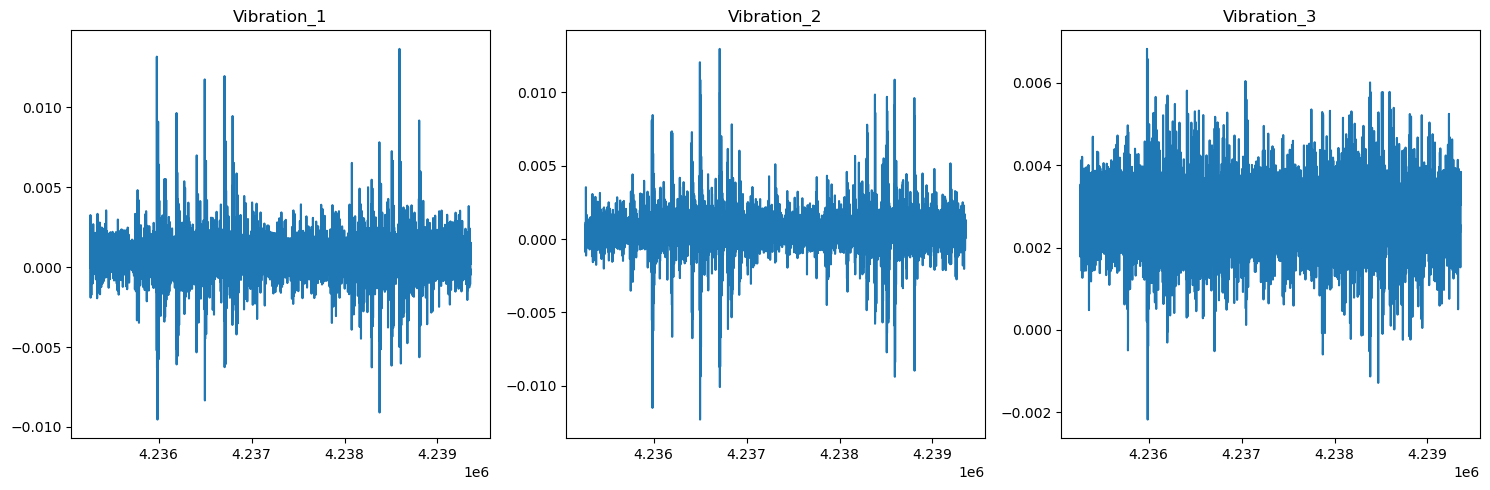

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].plot(train_0D_filtered[train_0D_filtered['Time_Index_Label']=='4.55_12S']['row_index'],train_0D_filtered[train_0D_filtered['Time_Index_Label']=='4.55_12S']['Vibration_1'])
axs[0].set_title('Vibration_1')
axs[1].plot(train_0D_filtered[train_0D_filtered['Time_Index_Label']=='4.55_12S']['row_index'],train_0D_filtered[train_0D_filtered['Time_Index_Label']=='4.55_12S']['Vibration_2'])
axs[1].set_title('Vibration_2')
axs[2].plot(train_0D_filtered[train_0D_filtered['Time_Index_Label']=='4.55_12S']['row_index'],train_0D_filtered[train_0D_filtered['Time_Index_Label']=='4.55_12S']['Vibration_3'])
axs[2].set_title('Vibration_3')
plt.tight_layout()
plt.show()

#### We can observe that Vibration_1 and Vibration_2 have similar profiles and amplitudes compared to Vibration_3, where the amplitude values are smaller. Hence, we should use Vibration_1/Vibration_2 data to train the ML models as the larger amplitudes ranges might make it easier to detect anomalies